(sec-lab1-cars)=
# Lab 1: Linear regression and the cars data

**Instructions for the labs**: For each lab, please run the commands in your own Python environment and make sure you understand what they do, You are also strongly encouraged to explore variants of the work on your own.

**Goals:**
1. Learn to load data into Python.
2. Learn to construct a linear regression model and measure its accuracy. 
3. Learn to improve linear models using variable transformations.
4. Learn the concept of overfitting.

**Useful commands:**
1. from sklearn.linear_model import LinearRegression
2. from sklearn.preprocessing import PolynomialFeatures

```{warning}
Before you start this lab, if you are using Google Colab, make sure the file "JSE_Car_Lab.csv" is loaded in your Colab environment. To do so, first click on the "folder" icon on the left side of the window in Colab:

![Folder icon](images/colab-load-file1.png){ width=300px }

Then click on the "upload" icon and select the [JSE_Car_Lab.csv](data/JSE_Car_Lab.csv) from where you saved it on your computer. 

![Folder icon](images/colab-load-file2.png){ width=300px }
```

In order to load and manipulate data, we will often use the *pandas* package. Let us also load the standard *numpy* package.

In [48]:
import pandas as pd
import numpy as np

The file JSE_Car_Lab.csv is a *comma-separated values* (CSV) file. It can be loaded in Python using 

In [49]:
data = pd.read_csv('JSE_Car_Lab.csv',delimiter=',')

In [50]:
data

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


As a first step, let us regress the price on mileage

In [51]:
y = np.array(data['Price'])
x = np.array(data['Mileage'])
x = x.reshape(len(x),1)

We are going to use the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> package to estimate the regression coefficients. Scikit-learn is a powerful package that implements many popular models. We will use it all the time in the course.

In [52]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True)

```{note}
LinearRegression is an [object](S-object) of the scikit-learn package.
```

The variable lin_model now contains a LinearRegression *object*. Like many scikit-learn objects, it contains a **fit** method that can be used to fit (estimate the parameters of) the model. It also has a **predict** method that can be used to predict new values. Let us first fit the model.  

In [53]:
lin_model.fit(x,y)
print(lin_model.coef_)
print(lin_model.intercept_)

[-0.1725205]
24764.55900606168


Our model is therefore $price = -0.17 * \textrm{mileage} + 24764.56$. 

Let's say we now want to predict the price of cars with 5,000 and 10,000 miles, respectively. 

In [54]:
x_new = np.array([[5000],[10000]])
lin_model.predict(x_new)

array([23901.95649211, 23039.35397815])

Our model predicts values of 23,902 and 23,039 dollars respectively.

To measure how good is our model, let us compute the residuals (the difference between the true values and the predicted values) and the MSE: 

In [55]:
residuals = y-lin_model.predict(x)
MSE = (residuals**2).mean()
print(MSE)

95591781.69890365


The MSE is quite large. We can investigate further by plotting the predicted values as a function of the true prices. Ideally, most points would be near the y = x line so let us add that line as well.

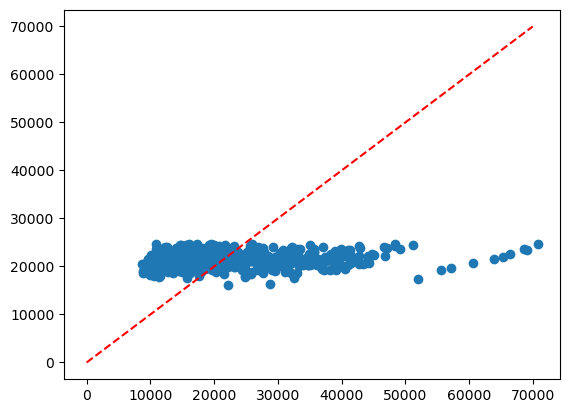

In [56]:
import matplotlib.pyplot as plt
plt.scatter(y, lin_model.predict(x))

xline = np.linspace(0,70000,100)
plt.plot(xline, xline, '--r')

This is pretty bad! One way to further improve the model is to add transformations of variables.

## Transforming variables

The linear model may seem very limited at first sight since it only considers *linear* relations. However, nothing prevents use to augment the dataset by including transformations of the variables such as $X_1^2, X_2^2, X_1X_2$, etc.. This can considerably improve the model. 

Let us first add more variables to our model to see if the fit gets better. 

In [57]:
X = np.array(data[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']])

In [58]:
lin_model.fit(X,y)

LinearRegression()

54038388.74411889


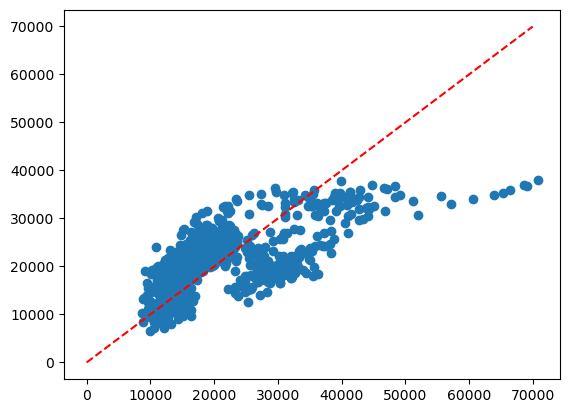

In [59]:
plt.scatter(y, lin_model.predict(X))

xline = np.linspace(0,70000,100)
plt.plot(xline, xline, '--r')

residuals2 = y-lin_model.predict(X)
MSE2 = (residuals2**2).mean()
print(MSE2)

Already much better! It looks like the bulk of the cars are now much better predicted by our linear model. Notice how some of the cars on the right do not seem to follow the same trend. These are all cars with value above 40,000 dollars. 

```{admonition} Exercise
Investigate what are the cars that the model does not predict well. Are they of the same make? Maybe they should be considered separately?
```

Let us now add transformations of the variables to further improve our model. Scikit-learn has a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">PolynomialFeatures</a> object that allows use to built polynomial transformations effortlessly. Let us add all squares ($X_1^2$, $X_2^2$, etc.) of the variables, as well as all the products ($X_1X_2$, $X_1X_3$, etc.). So, our dataset will now have: 
* All the original variables (7)
* All the squares of the variables (7)
* All the products of two distinct variables (21)

In total, that makes 35 variables.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

Let us verify that our dataset with added squares and products really has 35 variables.

In [61]:
X_poly.shape

(804, 35)

We can not fit our linear model to the transformed dataset. 

In [63]:
lin_model.fit(X_poly,y)

LinearRegression()

26865438.95141924


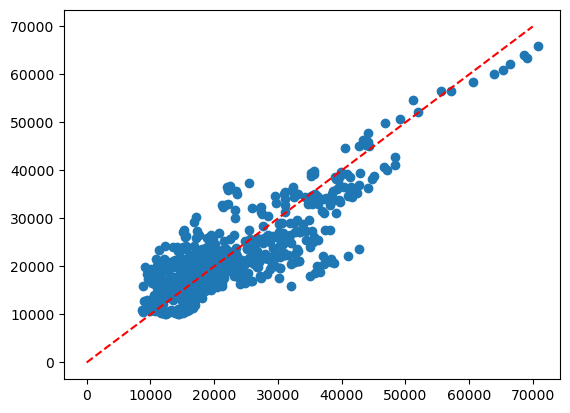

In [64]:
plt.scatter(y, lin_model.predict(X_poly))

xline = np.linspace(0,70000,100)
plt.plot(xline, xline, '--r')

residuals3 = y-lin_model.predict(X_poly)
MSE3 = (residuals3**2).mean()
print(MSE3)

Much better! Notice how the cars that were not following the general trend before now seem to be predicted much better. Each model we fitted was more complicated than the previous one. As a result the MSE keeps decreasing: 

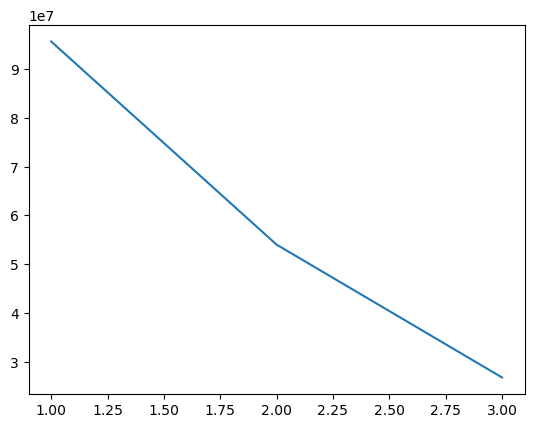

In [65]:
exp = [1,2,3]
MSEs = [MSE, MSE2, MSE3]
plt.plot(exp, MSEs)

There are lots of ways the model could still be improved! Try some of your ideas and see how well you can predict the car prices.

```{admonition} Exercise
Continue building on your model to improve its accuracy. For example, the command <a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html" target="_blank">pd.get_dummies()</a> can be used to create a one-hot encoding of certain variables. Try adding some of the discrete variables to the model. You may also want to try including some non-polynomial transformations. 
```

(S-overfitting)=
## Overfitting

```{warning}
When building models, it may seem like the more complex the model, the better the prediction. This is correct when working on the "training set" (the dataset that was provided for training the model). However, a very complicated model will tend to learn all the small (and irrelevant) variations in the training set, and will do a poor job at predicting new values. 
```

For example, consider the following data, along with a linear model and a fitted degree 7 polynomial: 

```{figure} images/overfit.png
---
caption: A degree $7$ polynomial overfits the data and fails to capture the general linear trend.
---
```

Observe that the degree 7 polynomial matches the data perfectly. However, the linear model captures the general linear trend and is likely to result in better predictions for data that has not been observed yet.

This phenomenon is called **overfitting** and will be discussed in the chapter [](C-learning-outside).  

```{admonition} Assignment
---
class: warning
---
Continue exploring the cars dataset and constructing better models. Upload your Lab 1 work as Homework 2 on <a href="https://sites.udel.edu/canvas/" target="_blank">Canvas</a>. 
```
